# Anomaly Detection

In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import Model
from keras.layers import Dense,Input,Dropout
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=10,6
RANDOM_SEED=42
LABELS=['Normal','Fraud']

In [4]:
#load the data
df=pd.read_csv('Diseases.csv')
df.head()


,Tiredness,Dry-Cough,Sore-Throat,Age_0-9,Severity,Non Severity
0,1,1,1,1,0,0
1,1,1,1,1,0,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0


In [5]:
df.shape

(316800, 6)

# Checking the missing values

In [6]:
df.isnull().values.any()

False

In [7]:
df.isna().sum().sum()


0

# Building Autoencoder Model


In [8]:
xtrain,xtest=train_test_split(df,test_size=0.2,random_state=RANDOM_SEED)

In [9]:
input_dim=xtrain.shape[1]
encoding_dim=14

In [10]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim,activation='tanh',
              activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder=Dense(int(encoding_dim/2),activation='relu')(encoder)
decoder=Dense(int(encoding_dim/2),activation='tanh')(encoder)
decoder=Dense(input_dim,activation='relu')(decoder)
autoencoder=Model(inputs=input_layer,outputs=decoder)


In [11]:
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 14)                98        
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 6)                 48        
                                                                 
Total params: 307 (1.20 KB)
Trainable params: 307 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the Model:

In [12]:
nb_epoch=30
batch_size=32
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer=ModelCheckpoint(filepath='model_ae.h5',
                             verbose=0,
                             save_best_only=True)

tensorboard=TensorBoard(log_dir='./logs',
                        histogram_freq=0,
                        write_graph=True,
                        write_images=True)

history=autoencoder.fit(xtrain,xtrain,
                       epochs=nb_epoch,
                       batch_size=batch_size,
                       shuffle=True,
                       validation_data=(xtest,xtest),
                       verbose=1,
                       callbacks=[checkpointer,tensorboard]).history



Epoch 1/30

7920/7920 [==============================] - 30s 4ms/step - loss: 0.0734 - accuracy: 0.4476 - val_loss: 0.0654 - val_accuracy: 0.4716
Epoch 2/30
  12/7920 [..............................] - ETA: 36s - loss: 0.0641 - accuracy: 0.4714

C:\Users\MEGHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7920/7920 [==============================] - 27s 3ms/step - loss: 0.0643 - accuracy: 0.4632 - val_loss: 0.0626 - val_accuracy: 0.4326
Epoch 3/30
7920/7920 [==============================] - 27s 3ms/step - loss: 0.0626 - accuracy: 0.4645 - val_loss: 0.0625 - val_accuracy: 0.4573
Epoch 4/30
7920/7920 [==============================] - 27s 3ms/step - loss: 0.0626 - accuracy: 0.4613 - val_loss: 0.0625 - val_accuracy: 0.4384
Epoch 5/30
7920/7920 [==============================] - 27s 3ms/step - loss: 0.0626 - accuracy: 0.4578 - val_loss: 0.0625 - val_accuracy: 0.4133
Epoch 6/30
7920/7920 [==============================] - 27s 3ms/step - loss: 0.0625 - accuracy: 0.4591 - val_loss: 0.0625 - val_accuracy: 0.4694
Epoch 7/30
7920/7920 [==============================] - 27s 3ms/step - loss: 0.0625 - accuracy: 0.4606 - val_loss: 0.0625 - val_accuracy: 0.5416
Epoch 8/30
7920/7920 [==============================] - 27s 3ms/step - loss: 0.0625 - accuracy: 0.4614 - val_loss: 0.0625 - val_accuracy: 0.4

In [13]:
from keras.models import load_model
autoencoder=load_model('model_ae.h5')


# Evaluation

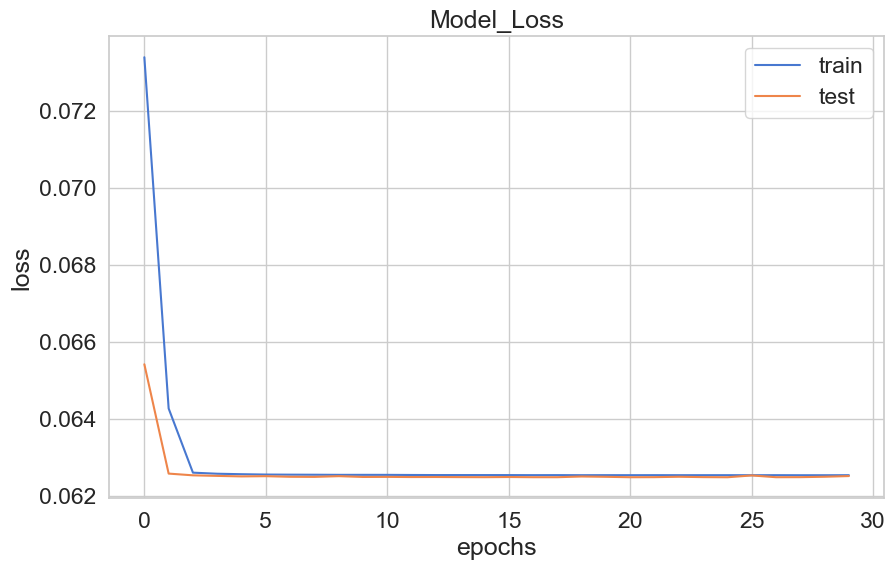

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')

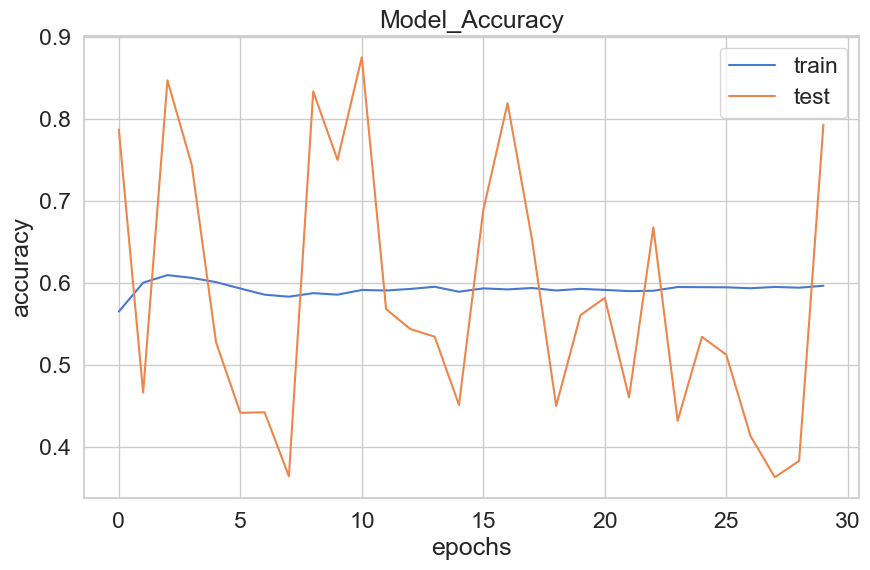

In [17]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')

In [15]:
predictions=autoencoder.predict(xtest)

1980/1980 [==============================] - 4s 2ms/step


In [16]:
# Assuming you have a DataFrame 'df' with a column 'Severity' containing your class labels
y = df['Severity'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42  # Replace with your desired random seed
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Severity', axis=1), y, test_size=0.2, random_state=RANDOM_SEED)

In [31]:
error_df

,Reconstruction_error,Severity
277936,8.926820e-06,1
193502,2.199471e-06,0
92446,5.900916e-07,0
117607,9.645201e-09,0
240924,1.938846e-07,0
...,...,...
122340,5.559766e-10,0
151370,9.645201e-09,0
288434,2.199471e-06,0
1619,2.253708e-06,0


In [32]:
error_df.describe()

,Reconstruction_error,Severity
count,6.336000e+04,63360.000000
mean,1.602763e-06,0.251089
std,2.127141e-06,0.433643
min,0.000000e+00,0.000000
25%,1.938846e-07,0.000000
50%,9.425752e-07,0.000000
75%,2.037956e-06,1.000000
max,1.011983e-05,1.000000


# Reconstruction error without Severity

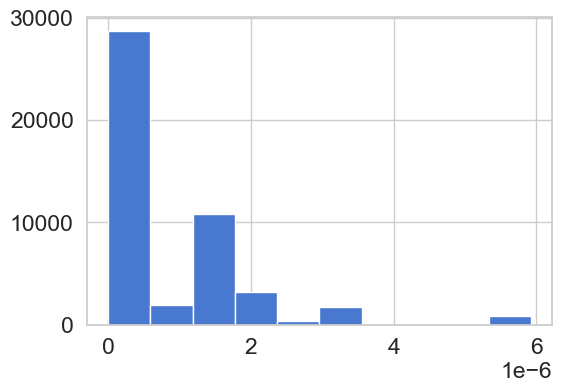

In [42]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
normal_error_df=error_df[(error_df['Severity']==0) & (error_df['Reconstruction_error']<1000)]
_=ax.hist(normal_error_df.Reconstruction_error.values,bins=10)


# Reconstruction error with Severity

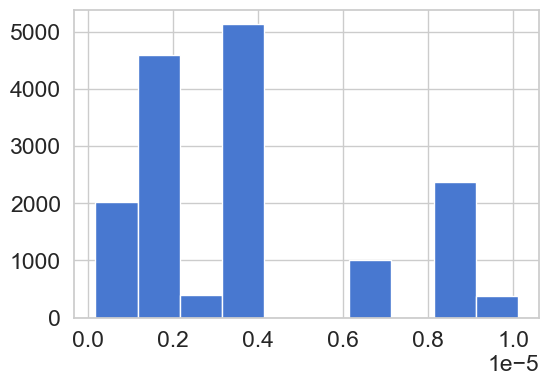

In [43]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
fraud_error_df=error_df[(error_df['Severity']==1)]
_=ax.hist(fraud_error_df.Reconstruction_error.values,bins=10)


In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve,auc,roc_curve,recall_score,f1_score
from sklearn.metrics import precision_recall_fscore_support

# ROC

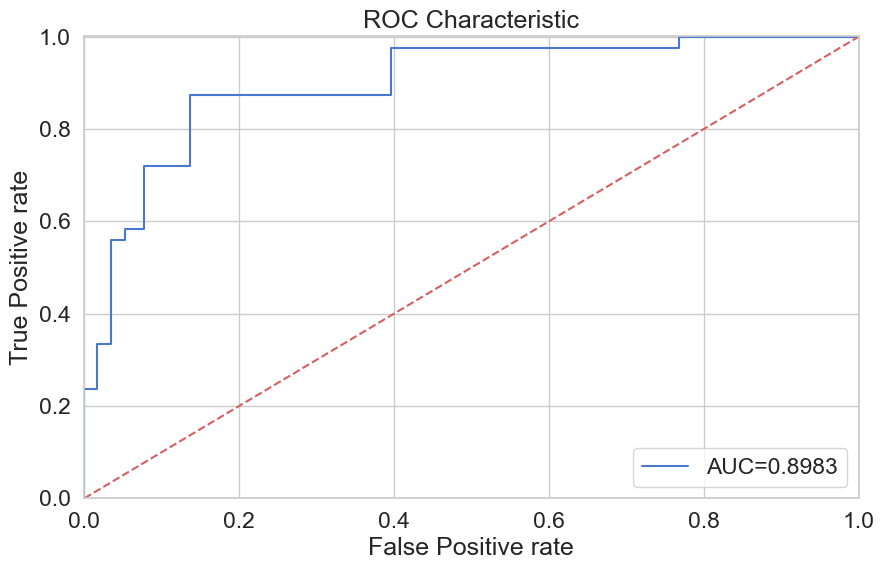

In [46]:
fpr,tpr,thresholds=roc_curve(error_df.Severity,error_df.Reconstruction_error)
roc_auc=auc(fpr,tpr)
plt.title('ROC Characteristic')
plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()


# Recall Vs Precision

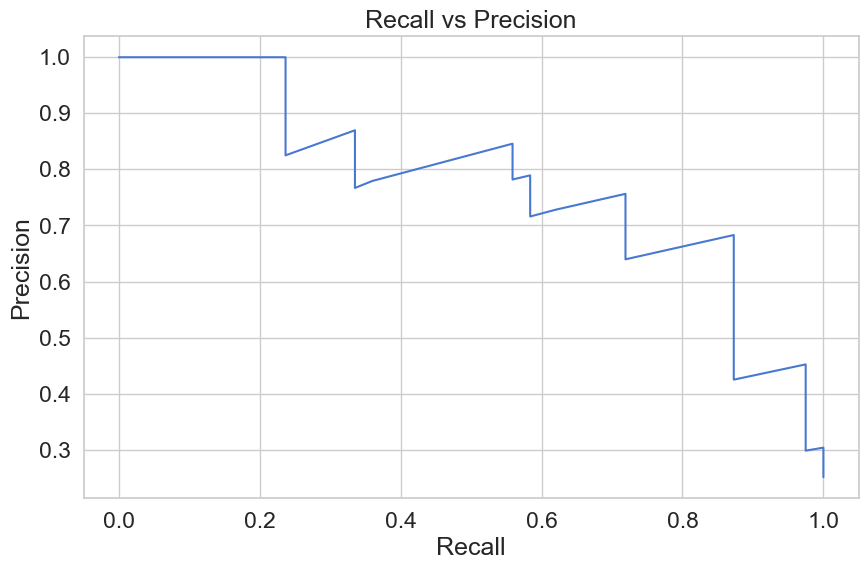

In [48]:
precision,recall,th=precision_recall_curve(error_df.Severity,error_df.Reconstruction_error)
plt.plot(recall,precision,'b',label='precision-recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# Precision vs threshold

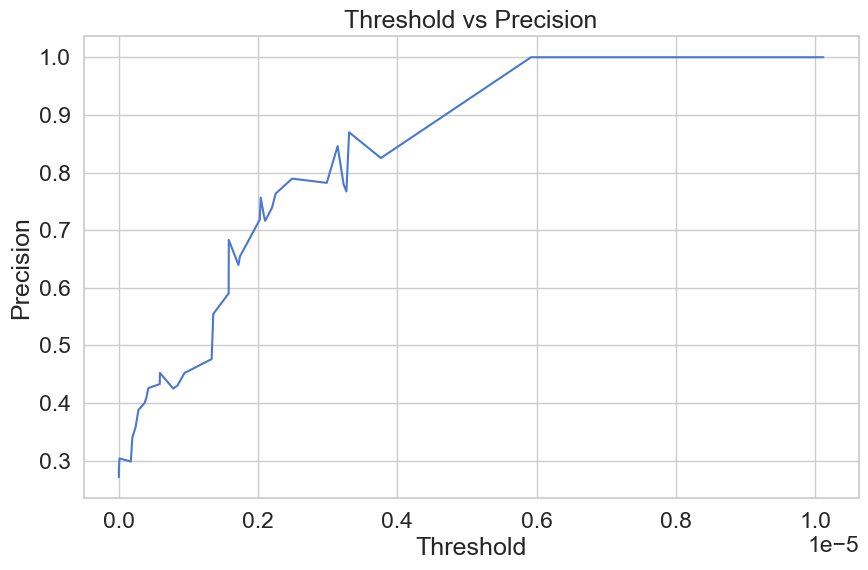

In [49]:
precision,recall,th=precision_recall_curve(error_df.Severity,error_df.Reconstruction_error)
plt.plot(th,precision[1:],'b',label='Threshold-precision curve')
plt.title('Threshold vs Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()
